Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import metrics


Loading data

In [2]:
df=pd.read_csv("Advertising 2.csv")

In [3]:
df.head()

,Unnamed: 0,Social_media,TV,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    200 non-null    int64  
 1   Social_media  200 non-null    float64
 2   TV            200 non-null    float64
 3   newspaper     200 non-null    float64
 4   sales         200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
df.isna().sum()

Unnamed: 0      0
Social_media    0
TV              0
newspaper       0
sales           0
dtype: int64

In [6]:
df.isnull().sum()

Unnamed: 0      0
Social_media    0
TV              0
newspaper       0
sales           0
dtype: int64

Data cleaning

In [7]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [8]:
df.describe()

,Social_media,TV,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
#check for duplicate rows
duplicate=df.duplicated()
duplicate.sum()

np.int64(0)

EDA: Visualizations

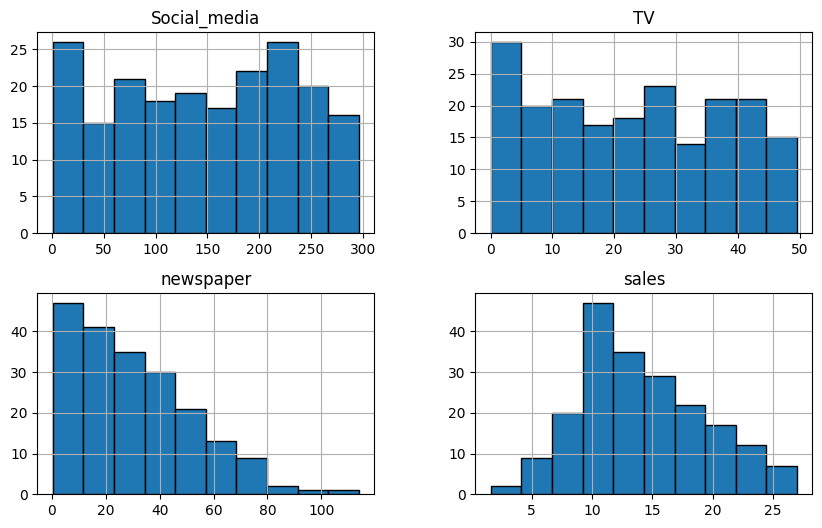

In [10]:
df.hist(figsize=(10,6),bins=10,grid=True,edgecolor='black')
plt.show()

Clearly Newspaper is right skewed

<Axes: >

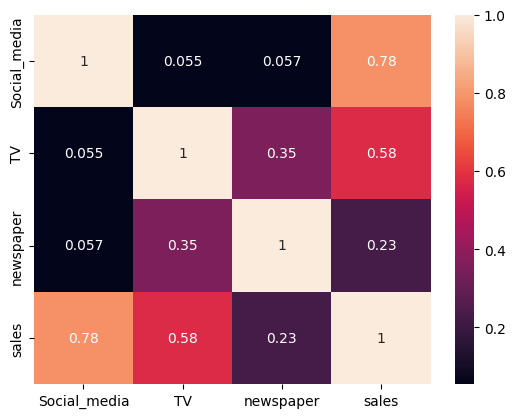

In [11]:
sns.heatmap(data=df.corr(),annot=True)

In [12]:
df.corr().abs().unstack().sort_values(ascending=False)

Social_media  Social_media    1.000000
TV            TV              1.000000
newspaper     newspaper       1.000000
sales         sales           1.000000
Social_media  sales           0.782224
sales         Social_media    0.782224
TV            sales           0.576223
sales         TV              0.576223
TV            newspaper       0.354104
newspaper     TV              0.354104
              sales           0.228299
sales         newspaper       0.228299
Social_media  newspaper       0.056648
newspaper     Social_media    0.056648
Social_media  TV              0.054809
TV            Social_media    0.054809
dtype: float64

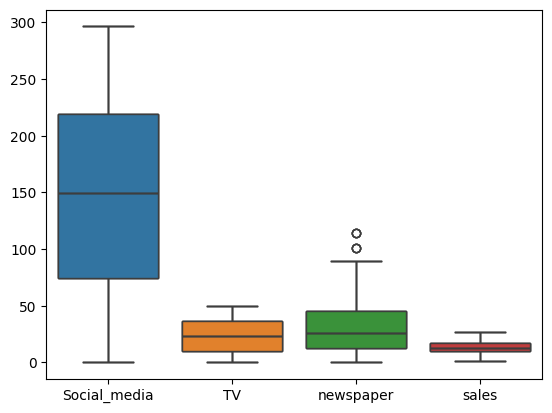

In [13]:
for i in df.columns:
    sns.boxplot(data=df)


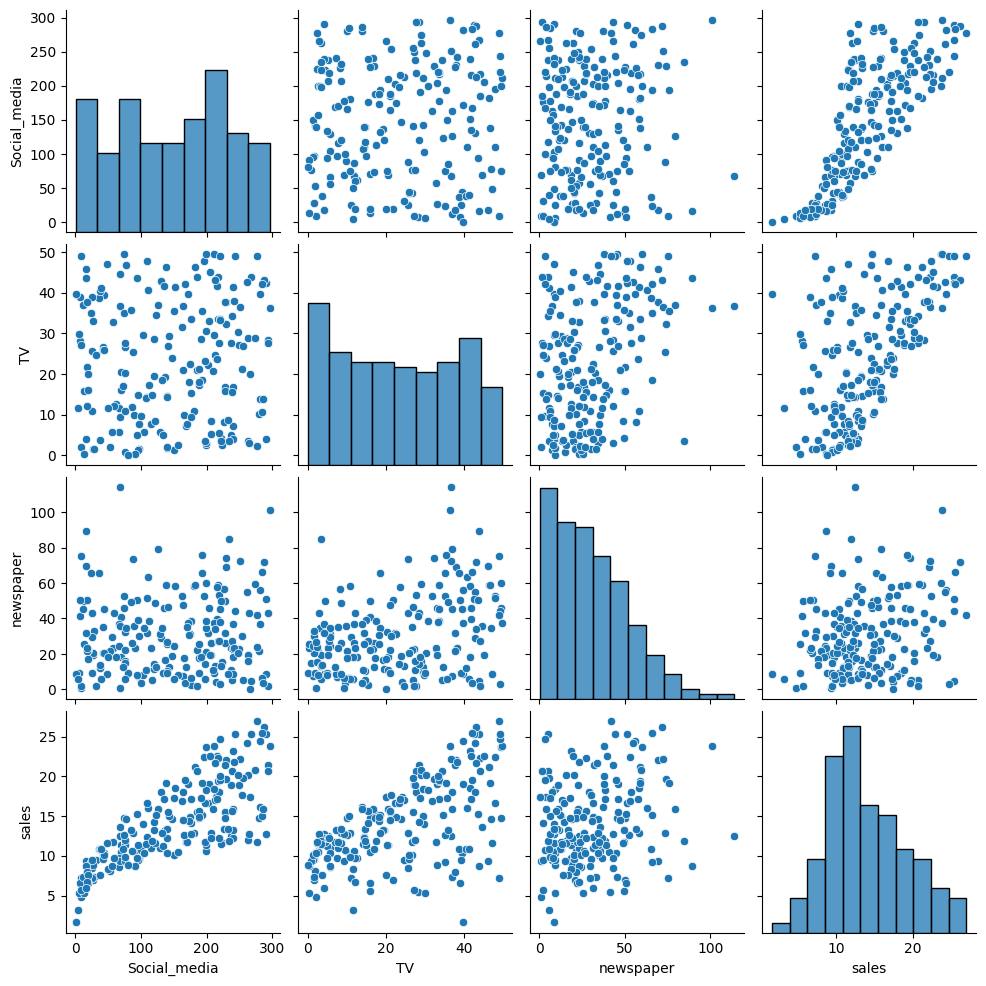

In [14]:
sns.pairplot(data=df)

Normality Check

Probplot and Box-Cox Transformation

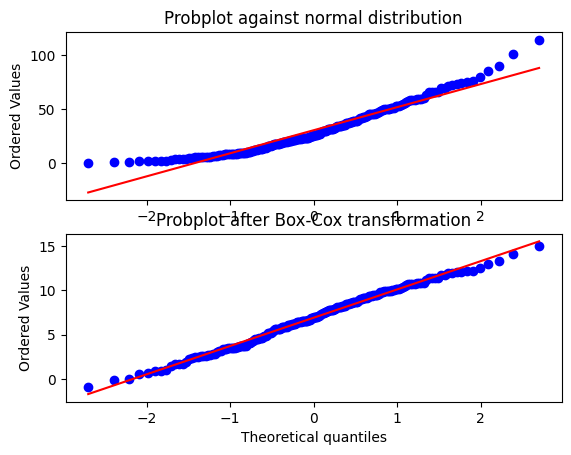

In [15]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
x = df['newspaper']
prob = stats.probplot(x, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')
#Using boxcox to transform the data so it’s closest to normal distribution
ax2 = fig.add_subplot(212)
df['newspaper'], _ = stats.boxcox(x)
prob = stats.probplot(df['newspaper'], dist=stats.norm, plot=ax2)
print("")
ax2.set_title('Probplot after Box-Cox transformation')

plt.show()


Since newspaper was not normal distribution we do boxcox transform in newspaper and make it normal distribution

Updated pairplot

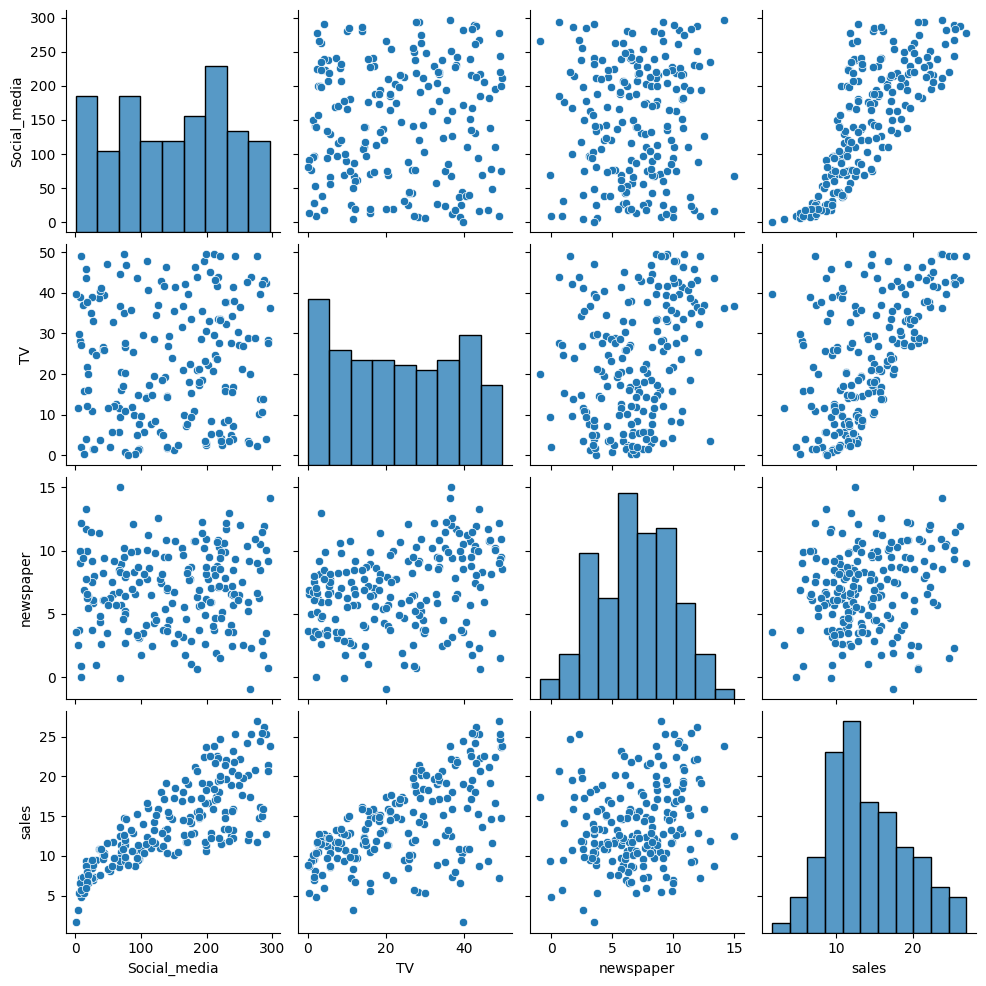

In [16]:
sns.pairplot(data=df)

Modeling - Linear Regression

Feature-Target Split

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [18]:
x=df.drop(['sales'],axis=1)

Multicollinearity Check

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=df.drop(['sales'], axis=1)
vif_data = pd.DataFrame()
vif_data['Feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
print(vif_data)

        Feature       VIF
0  Social_media  2.882169
1            TV  3.503363
2     newspaper  4.252224


In [20]:
y=df['sales']

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [22]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [23]:
model.score(x_train,y_train),model.score(x_test,y_test)


(0.8850723297977667, 0.9225422486434215)

In [24]:
y_pred_linear=model.predict(x_test)
y_pred_linear

array([21.67317739, 16.45573864,  7.67079458, 17.92351549, 18.6834648 ,
       23.80515738, 16.30113465, 13.46541049,  9.17483453, 17.34493357,
       14.46034879,  9.84207073, 17.21796451, 16.6430905 , 15.11601731,
       15.51407081, 12.45200375, 17.3067335 , 11.01973395, 18.03379956,
        9.31018775, 12.78936835,  8.75450017, 10.45973381, 11.40245573,
       15.03729119,  9.75747815, 19.45142204, 18.13952902, 17.20942111,
       21.55825699, 14.72318207, 16.22670298, 12.39184   , 19.97101425,
       15.37356959, 13.99896528, 10.09679378, 20.92367911,  7.4386163 ,
        3.68767847,  7.29163712,  6.00692255, 18.43213901,  8.33802398,
       14.11043767, 14.94750889, 20.36891384, 20.55840866, 19.56810673,
       24.11790836, 14.83543066,  6.72403313, 19.79174219, 18.84918824,
       12.51360662, 14.21616844,  6.12634436, 15.35038379,  9.57162178])

In [25]:
print('MAE : ', metrics.mean_absolute_error(y_test,y_pred_linear))
print('MSE : ', metrics.mean_squared_error(y_test,y_pred_linear))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test,y_pred_linear)))
print('R-Squared : ', (metrics.r2_score(y_test,y_pred_linear))*100)

MAE :  1.0543000750508655
MSE :  1.9268930280117755
RMSE :  1.388125724857722
R-Squared :  92.25422486434215


In [26]:
coefficients = pd.Series(model.coef_,x.columns)
coefficients

Social_media    0.046942
TV              0.176308
newspaper       0.018721
dtype: float64

since TV has high coefficient that TV has the highest weightage to the sales

In [27]:
intercept = model.intercept_
print(f"Intercept: {intercept}")


Intercept: 2.8728847904052675


Intercept is the value of sales when all other factors(variables) is zero

In [28]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(model)
sfm.fit(x_train, y_train)

selected_features = x_train.columns[sfm.get_support()]
selected_features

Index(['TV'], dtype='object')

here in the above cell doing feature selection: find out most important feature

In [29]:

result = pd.DataFrame()
result['xtest - TV'] = x_test['TV'].copy()
result['xtest - Social_media'] = x_test['Social_media'].copy()
result['xtest - newspaper'] = x_test['newspaper'].copy()
result['ytest'] = y_test.copy()
result['ypred'] = y_pred_linear.copy()

print(result.head())  # Display first few rows

     xtest - TV  xtest - Social_media  xtest - newspaper  ytest      ypred
58         49.6                 210.8           8.547029   23.8  21.673177
40         22.3                 202.5           7.766718   16.6  16.455739
34          1.4                  95.7           3.136360    9.5   7.670795
102        10.1                 280.2           6.235264   14.8  17.923515
184        21.3                 253.8           7.547804   17.6  18.683465


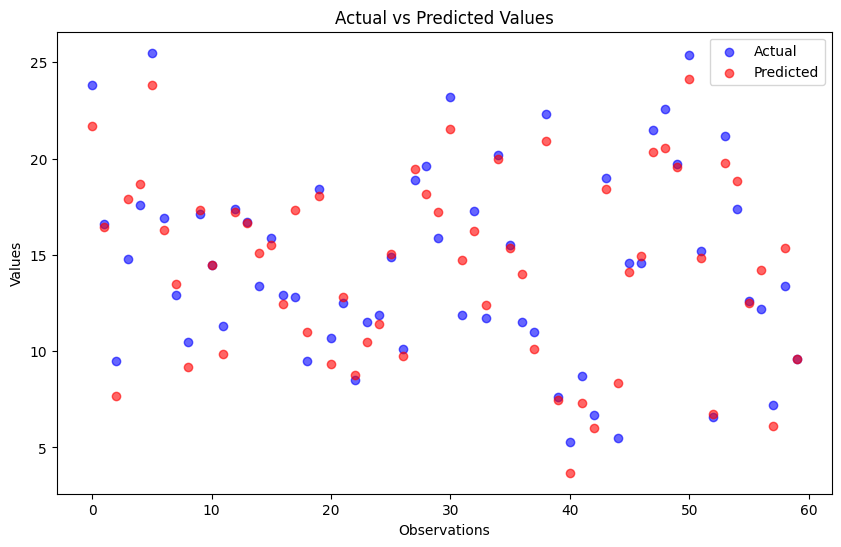

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual', color='blue', alpha=0.6)
plt.scatter(range(len(y_pred_linear)), y_pred_linear, label='Predicted', color='red', alpha=0.6)
plt.title('Actual vs Predicted Values')
plt.xlabel('Observations')
plt.ylabel('Values')
plt.legend()
plt.show()


## Random forest regression

In [31]:
model_test=RandomForestRegressor()
model_test.fit(x_train,y_train)

RandomForestRegressor()

Feature Importance: Shows how much each feature contributes to predicting sales in the Random Forest model.

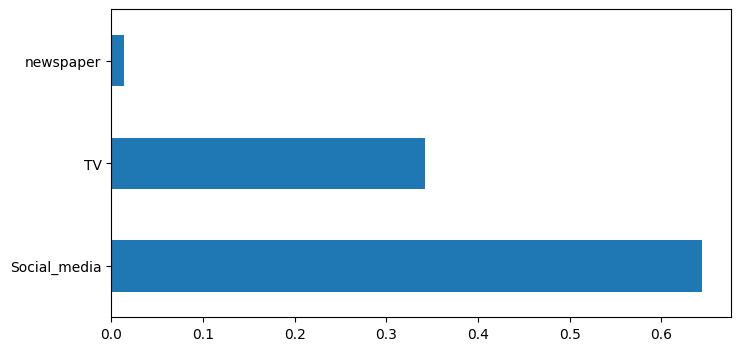

In [32]:
y_pred=model_test.predict(x_test)
feature_imp=pd.Series(model_test.feature_importances_,index=x.columns)
feature_imp.plot(kind='barh',figsize=(8,4))
plt.show()


In [33]:
pd.Series(model_test.feature_importances_,index=x.columns)

Social_media    0.643981
TV              0.342587
newspaper       0.013431
dtype: float64

In [34]:
print('MAE : ', metrics.mean_absolute_error(y_test,y_pred))
print('MSE : ', metrics.mean_squared_error(y_test,y_pred))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R-Squared : ', (metrics.r2_score(y_test,y_pred))*100)

MAE :  0.5275500000000001
MSE :  0.45262864999999847
RMSE :  0.6727768203498085
R-Squared :  98.18051148045622


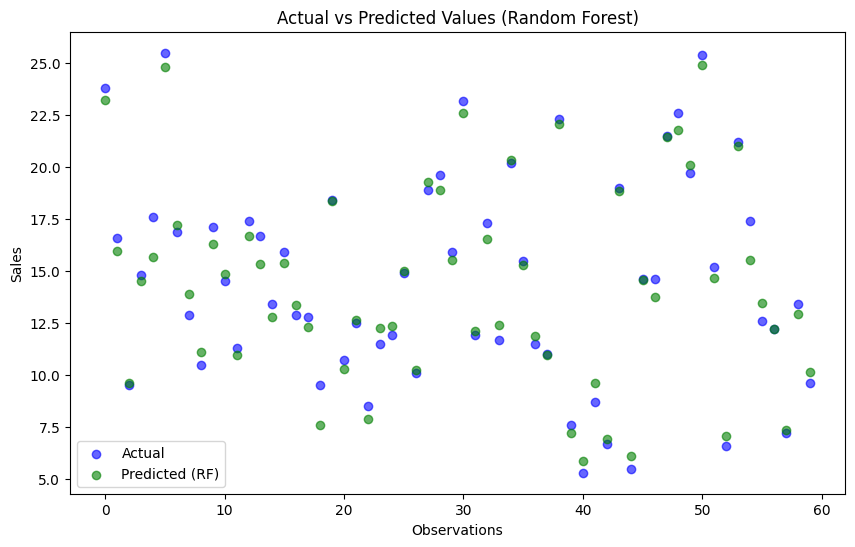

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual', color='blue', alpha=0.6)
plt.scatter(range(len(y_pred)), y_pred, label='Predicted (RF)', color='green', alpha=0.6)
plt.title('Actual vs Predicted Values (Random Forest)')
plt.xlabel('Observations')
plt.ylabel('Sales')
plt.legend()
plt.show()


## Ridge Regression

In [36]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np



# Instantiate the Ridge model
ridge_model = Ridge(alpha=1.0)  # You can adjust alpha to control regularization strength

# Fit the model
ridge_model.fit(x_train, y_train)

# Make predictions
y_pred_ridge = ridge_model.predict(x_test)

# Evaluate the model
print("MAE: ", mean_absolute_error(y_test, y_pred_ridge))
print("MSE: ", mean_squared_error(y_test, y_pred_ridge))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("R-Squared: ", r2_score(y_test, y_pred_ridge))


MAE:  1.054318712971175
MSE:  1.9269690288648866
RMSE:  1.3881530999370661
R-Squared:  0.9225391935411934


In [37]:
coefficients = pd.Series(ridge_model.coef_,x.columns)
coefficients

Social_media    0.046942
TV              0.176303
newspaper       0.018716
dtype: float64

In [38]:
intercept = ridge_model.intercept_  # Intercept
print("Intercept: ", intercept)

Intercept:  2.873035626671772


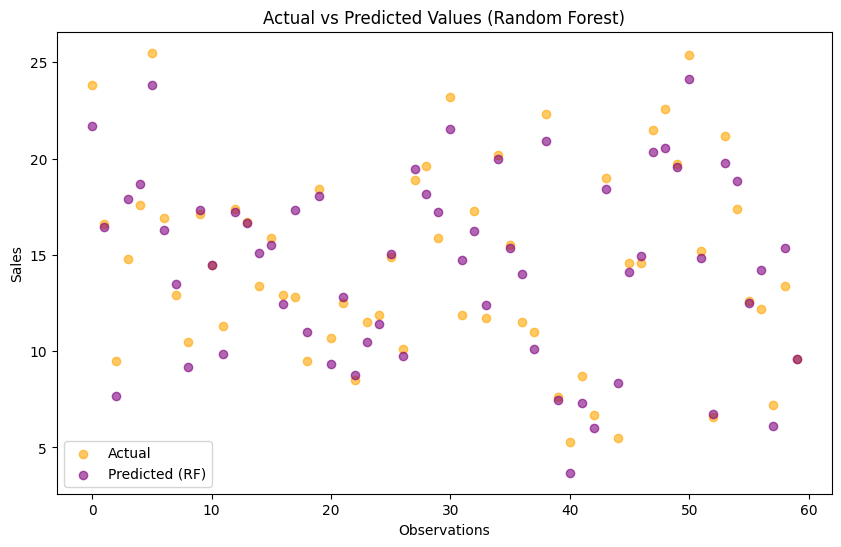

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual', color='orange', alpha=0.6)
plt.scatter(range(len(y_pred_ridge)), y_pred_ridge, label='Predicted (RF)', color='purple', alpha=0.6)
plt.title('Actual vs Predicted Values (Random Forest)')
plt.xlabel('Observations')
plt.ylabel('Sales')
plt.legend()
plt.show()

## Adstock transformation

In [70]:
import numpy as np
import pandas as pd

# Define half-lives (based on marketing standard)
half_lives = { 'Social_media': 3, 'TV': 7, 'newspaper': 2}

# Function to compute Adstock transformation
def adstock_transform(series, half_life):
    decay = 0.5 ** (1 / half_life)  # Compute decay factor
    adstock = np.zeros(len(series))  # Initialize array
    
    adstock[0] = series.iloc[0]  # First value remains the same
    for t in range(1, len(series)):
        adstock[t] = series.iloc[t] + decay * adstock[t - 1]  # Apply decay
    
    return adstock

# Apply Adstock transformation to each channel
for channel, half_life in half_lives.items():
    df[f'{channel}_Adstock'] = adstock_transform(df[channel], half_life)

# Display results
print(df[['Social_media_Adstock', 'TV_Adstock', 'newspaper_Adstock']].head())


    Social_media_Adstock  TV_Adstock  newspaper_Adstock
7             120.200000   19.600000           4.282208
8             104.002803   19.852184           3.027978
9             282.347080   20.580593           8.342476
10            290.199026   24.440330          12.590660
11            445.031119   46.136185          10.783502


In [71]:
df

,Social_media,TV,newspaper,sales,Social_media_Adstock,TV_Adstock,newspaper_Adstock,Social_media_Adstock_Lag1,Social_media_Adstock_Lag2,Social_media_Adstock_Lag3,...,newspaper_Adstock_Lag2,newspaper_Adstock_Lag3,newspaper_Adstock_Lag4,newspaper_Adstock_Lag5,newspaper_Adstock_Lag6,newspaper_Adstock_Lag7,log_Social_Adstock,log_TV_Adstock,log_newspaper_Adstock,log_sales
7,120.2,19.6,4.282208,13.2,120.200000,19.600000,4.282208,332.419504,346.376870,425.446196,...,33.754807,30.476932,27.897267,24.235730,17.687982,11.719889,5.953351,5.272030,3.288878,2.653242
8,8.6,2.1,0.000000,4.8,104.002803,19.852184,3.027978,384.041535,332.419504,346.376870,...,30.448801,33.754807,30.476932,27.897267,24.235730,17.687982,5.750710,5.185369,2.957635,1.757858
9,199.8,2.6,6.201372,10.6,282.347080,20.580593,8.342476,313.413968,384.041535,332.419504,...,25.812762,30.448801,33.754807,30.476932,27.897267,24.235730,6.108262,5.102862,3.001105,2.451005
10,66.1,5.8,6.691639,8.6,290.199026,24.440330,12.590660,448.556831,313.413968,384.041535,...,18.252379,25.812762,30.448801,33.754807,30.476932,27.897267,6.047655,5.042642,3.054136,2.261763
11,214.7,24.0,1.880561,17.4,445.031119,46.136185,10.783502,422.119793,448.556831,313.413968,...,19.107753,18.252379,25.812762,30.448801,33.754807,30.476932,6.311257,5.102129,2.842939,2.912351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,38.2,3.7,4.786082,7.6,520.529390,212.058639,13.820284,607.696951,577.040000,516.870011,...,14.290509,17.811099,14.204899,16.310865,19.390120,18.138134,6.256766,5.361567,2.695997,2.151762
196,94.2,4.9,3.349723,9.7,507.344451,196.966528,13.122140,520.529390,607.696951,577.040000,...,12.776292,14.290509,17.811099,14.204899,16.310865,19.390120,6.231159,5.288098,2.647744,2.370244
197,177.0,9.3,2.810135,12.8,579.679557,187.697245,12.088889,507.344451,520.529390,607.696951,...,13.820284,12.776292,14.290509,17.811099,14.204899,16.310865,6.364199,5.240144,2.571764,2.624669
198,283.6,42.0,11.460018,25.5,743.691970,212.001837,20.008153,579.679557,507.344451,520.529390,...,13.122140,13.820284,12.776292,14.290509,17.811099,14.204899,6.612971,5.361301,3.044911,3.277145


Adding lag to the Adstock

In [72]:
# Define max lag range
max_lag = 7  

# Add lagged features for each Adstock variable
for channel in half_lives.keys():
    for lag in range(1, max_lag + 1):
        df[f'{channel}_Adstock_Lag{lag}'] = df[f'{channel}_Adstock'].shift(lag)

# Drop NaN rows caused by shifting
df.dropna(inplace=True)

# Compute correlation of lags with sales
correlation_matrix = df.corr()
corr_with_sales = correlation_matrix['sales'].sort_values(ascending=False)

# Display correlation values
print("Correlation of Adstock + Lag features with Sales:")
print(corr_with_sales)


Correlation of Adstock + Lag features with Sales:
sales                        1.000000
log_sales                    0.964820
Social_media                 0.777298
TV                           0.608209
log_Social_Adstock           0.453661
Social_media_Adstock         0.440329
newspaper                    0.207679
log_TV_Adstock               0.129928
newspaper_Adstock            0.106242
log_newspaper_Adstock        0.097271
TV_Adstock                   0.078668
Social_media_Adstock_Lag6    0.027534
Social_media_Adstock_Lag1    0.008383
Social_media_Adstock_Lag5    0.002242
Social_media_Adstock_Lag2   -0.005926
newspaper_Adstock_Lag3      -0.020988
newspaper_Adstock_Lag2      -0.021675
newspaper_Adstock_Lag4      -0.025733
Social_media_Adstock_Lag4   -0.027541
Social_media_Adstock_Lag3   -0.028823
Social_media_Adstock_Lag7   -0.047047
newspaper_Adstock_Lag1      -0.049500
newspaper_Adstock_Lag6      -0.062235
newspaper_Adstock_Lag7      -0.068453
TV_Adstock_Lag5             -0.078105


In [73]:
# Compute Spearman's rank correlation
spearman_corr_matrix = df.corr(method='spearman')

# Get correlation of all features with Sales
spearman_corr_with_sales = spearman_corr_matrix['sales'].sort_values(ascending=False)

# Display correlation values
print("Spearman's Correlation of Adstock + Lag features with Sales:")
print(spearman_corr_with_sales)


Spearman's Correlation of Adstock + Lag features with Sales:
log_sales                    1.000000
sales                        1.000000
Social_media                 0.790365
TV                           0.595075
log_Social_Adstock           0.441307
Social_media_Adstock         0.434181
newspaper                    0.218265
log_TV_Adstock               0.134598
log_newspaper_Adstock        0.103134
TV_Adstock                   0.098789
newspaper_Adstock            0.097137
Social_media_Adstock_Lag6    0.050977
newspaper_Adstock_Lag2       0.020261
newspaper_Adstock_Lag3       0.014460
Social_media_Adstock_Lag5    0.012693
Social_media_Adstock_Lag1   -0.005141
newspaper_Adstock_Lag4      -0.006721
Social_media_Adstock_Lag2   -0.009525
TV_Adstock_Lag5             -0.011212
Social_media_Adstock_Lag7   -0.015369
newspaper_Adstock_Lag7      -0.016363
newspaper_Adstock_Lag6      -0.026979
newspaper_Adstock_Lag1      -0.028064
Social_media_Adstock_Lag4   -0.029697
Social_media_Adstock_Lag3  

Since correlation of lag values to sale is very low so we ignore the lag values

In [74]:
# Log transformation for Adstocked variables

df['log_Social_Adstock'] = np.log(df['Social_media_Adstock'] + 1)
df['log_TV_Adstock'] = np.log(df['TV_Adstock'] + 1)  
df['log_newspaper_Adstock'] = np.log(df['newspaper_Adstock'] + 1)

In [75]:
# Log transform target
df['log_sales'] = np.log(df['sales'] + 1)

In [76]:
df

,Social_media,TV,newspaper,sales,Social_media_Adstock,TV_Adstock,newspaper_Adstock,Social_media_Adstock_Lag1,Social_media_Adstock_Lag2,Social_media_Adstock_Lag3,...,newspaper_Adstock_Lag2,newspaper_Adstock_Lag3,newspaper_Adstock_Lag4,newspaper_Adstock_Lag5,newspaper_Adstock_Lag6,newspaper_Adstock_Lag7,log_Social_Adstock,log_TV_Adstock,log_newspaper_Adstock,log_sales
14,204.1,32.9,9.498884,19.0,518.994421,102.856325,21.201381,396.742110,377.021433,445.031119,...,19.058745,10.783502,12.590660,8.342476,3.027978,4.282208,6.253818,4.643008,3.100155,2.995732
15,195.4,47.7,10.216597,22.4,607.326145,140.859407,25.208238,518.994421,396.742110,377.021433,...,16.549831,19.058745,10.783502,12.590660,8.342476,3.027978,6.410711,4.954836,3.266074,3.152736
16,67.8,36.6,15.006456,12.5,549.835081,164.179698,32.831372,607.326145,518.994421,396.742110,...,21.201381,16.549831,19.058745,10.783502,12.590660,8.342476,6.311435,5.107034,3.521389,2.602690
17,281.4,39.6,10.501968,24.4,717.804393,188.301438,33.717254,549.835081,607.326145,518.994421,...,25.208238,21.201381,16.549831,19.058745,10.783502,12.590660,6.577589,5.243341,3.547237,3.234749
18,69.2,20.5,5.687489,11.3,638.921724,191.049068,29.529188,717.804393,549.835081,607.326145,...,32.831372,25.208238,21.201381,16.549831,19.058745,10.783502,6.461346,5.257751,3.418683,2.509599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,38.2,3.7,4.786082,7.6,520.529390,212.058639,13.820284,607.696951,577.040000,516.870011,...,14.290509,17.811099,14.204899,16.310865,19.390120,18.138134,6.256766,5.361567,2.695997,2.151762
196,94.2,4.9,3.349723,9.7,507.344451,196.966528,13.122140,520.529390,607.696951,577.040000,...,12.776292,14.290509,17.811099,14.204899,16.310865,19.390120,6.231159,5.288098,2.647744,2.370244
197,177.0,9.3,2.810135,12.8,579.679557,187.697245,12.088889,507.344451,520.529390,607.696951,...,13.820284,12.776292,14.290509,17.811099,14.204899,16.310865,6.364199,5.240144,2.571764,2.624669
198,283.6,42.0,11.460018,25.5,743.691970,212.001837,20.008153,579.679557,507.344451,520.529390,...,13.122140,13.820284,12.776292,14.290509,17.811099,14.204899,6.612971,5.361301,3.044911,3.277145


In [95]:
X = df[['log_Social_Adstock', 'log_TV_Adstock', 'log_newspaper_Adstock']]
y = df['log_sales']  # log of sales


## Bayesian Linear Regression with MCMC Sampling

In [134]:
import pymc as pm
import arviz as az

with pm.Model() as mmm_model:
    # Priors for intercept and coefficients
    intercept = pm.Normal('intercept', mu=2.8728847904052675, sigma=1)
    beta_social = pm.Normal('beta_social', mu=0.046942, sigma=1)
    beta_tv = pm.Normal('beta_tv', mu=0.176308, sigma=1)
    beta_news = pm.Normal('beta_news', mu=0.018721, sigma=1)
    

    # Expected value (linear model)
    mu = (intercept 
          + beta_social * X['log_Social_Adstock'] 
          + beta_tv * X['log_TV_Adstock'] 
          + beta_news * X['log_newspaper_Adstock'])

    # Likelihood
    sigma = pm.Exponential('sigma', 1)
    likelihood = pm.Normal('obs', mu=mu, sigma=sigma, observed=y)

    # Inference: Sample from posterior #MCMC Sampling
    trace = pm.sample(2000, tune=1000, target_accept=0.95, return_inferencedata=True)


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, beta_social, beta_tv, beta_news, sigma]


/opt/miniconda3/envs/pandas_env/lib/python3.10/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" 
for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 19 seconds.


In [135]:
az.summary(trace, hdi_prob=0.95)


,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
intercept,-0.127,0.800,-1.661,1.486,0.013,0.009,4049.0,4602.0,1.0
beta_social,0.509,0.096,0.322,0.701,0.001,0.001,4409.0,3957.0,1.0
beta_tv,-0.112,0.124,-0.361,0.124,0.002,0.001,4138.0,4321.0,1.0
beta_news,0.018,0.126,-0.239,0.263,0.002,0.002,5324.0,4541.0,1.0
sigma,0.344,0.019,0.309,0.382,0.000,0.000,5521.0,4765.0,1.0


array([<Axes: title={'center': 'beta_social'}>,
       <Axes: title={'center': 'beta_tv'}>,
       <Axes: title={'center': 'beta_news'}>], dtype=object)

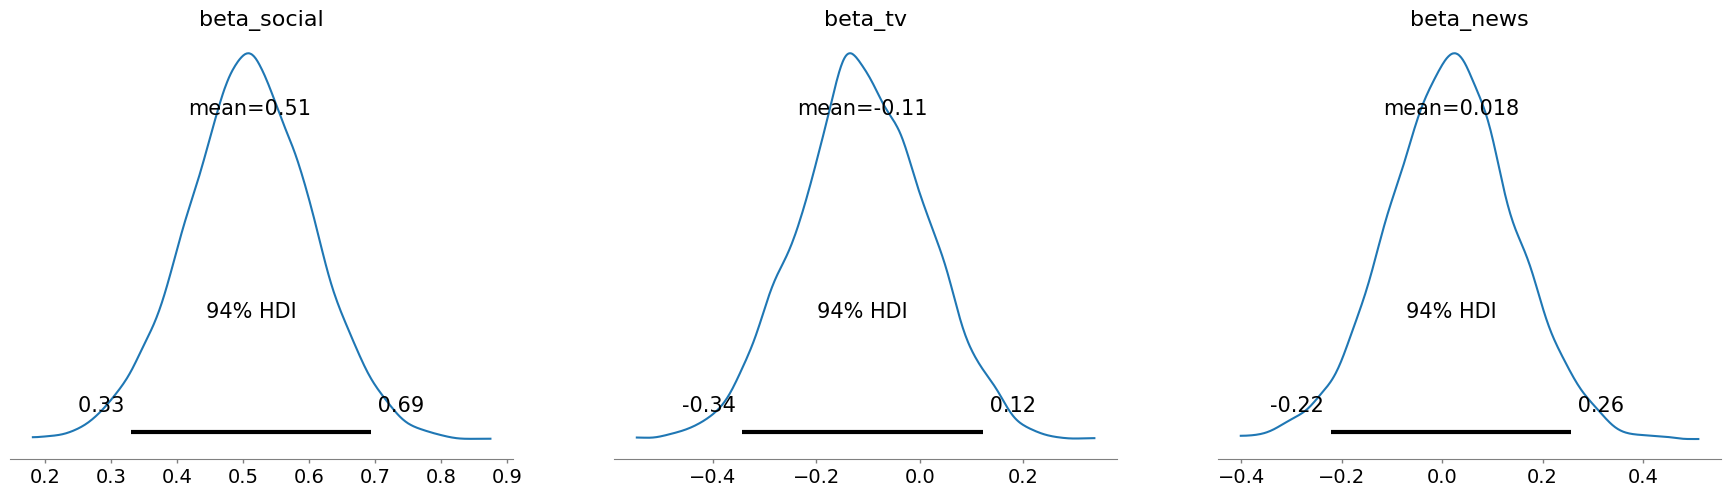

In [136]:
az.plot_posterior(trace, var_names=['beta_social', 'beta_tv', 'beta_news'])


In [137]:
# Print all variables in the trace to check the correct names
print(trace.posterior.variables)


Frozen({'chain': <xarray.IndexVariable 'chain' (chain: 4)> Size: 32B
array([0, 1, 2, 3]), 'draw': <xarray.IndexVariable 'draw' (draw: 2000)> Size: 16kB
array([   0,    1,    2, ..., 1997, 1998, 1999], shape=(2000,)), 'intercept': <xarray.Variable (chain: 4, draw: 2000)> Size: 64kB
array([[-0.38453056, -0.76612286, -0.11344093, ..., -0.84360412,
        -1.66243276,  0.07109367],
       [ 0.42077996,  1.11392193,  0.90803036, ..., -0.14280447,
        -0.08108061, -0.57817539],
       [-0.25739207,  0.19015663, -1.73619997, ..., -0.50475653,
        -0.52969722,  0.69645787],
       [-0.34863111, -1.56057489, -1.47663149, ...,  0.64236706,
         1.310383  , -1.70869383]], shape=(4, 2000)), 'beta_social': <xarray.Variable (chain: 4, draw: 2000)> Size: 64kB
array([[0.60836248, 0.65741463, 0.38539349, ..., 0.6211256 , 0.55164518,
        0.63596851],
       [0.54103116, 0.53848043, 0.48955982, ..., 0.64855988, 0.62933695,
        0.72080452],
       [0.53595795, 0.48602251, 0.67049035, 

In [138]:
# Exponentiate the coefficients to interpret as percentage change
exp_beta_social = np.exp(trace.posterior['beta_social'].mean(dim='draw').values)
exp_beta_tv = np.exp(trace.posterior['beta_tv'].mean(dim='draw').values)
exp_beta_news = np.exp(trace.posterior['beta_news'].mean(dim='draw').values)

# Print the results
print(f"Exponentiated Beta for Social Media: {exp_beta_social}")
print(f"Exponentiated Beta for TV: {exp_beta_tv}")
print(f"Exponentiated Beta for Newspaper: {exp_beta_news}")

Exponentiated Beta for Social Media: [1.66683883 1.66728368 1.65789925 1.66279848]
Exponentiated Beta for TV: [0.89357749 0.89419483 0.89478294 0.89367991]
Exponentiated Beta for Newspaper: [1.01897985 1.01845911 1.02264196 1.01392139]


In [139]:

# Print the shape of the coefficients to check their structure
print(f"Shape of beta_social: {trace.posterior['beta_social'].shape}")
print(f"Shape of beta_tv: {trace.posterior['beta_tv'].shape}")
print(f"Shape of beta_news: {trace.posterior['beta_news'].shape}")

Shape of beta_social: (4, 2000)
Shape of beta_tv: (4, 2000)
Shape of beta_news: (4, 2000)


In [140]:
# Exponentiated betas (ROAS estimates)
ROAS_social = exp_beta_social.mean()  # Mean of the posterior distribution
ROAS_tv = exp_beta_tv.mean()
ROAS_news = exp_beta_news.mean()

print(f"ROAS for Social Media: {ROAS_social}")
print(f"ROAS for TV: {ROAS_tv}")
print(f"ROAS for Newspaper: {ROAS_news}")


ROAS for Social Media: 1.6637050601752288
ROAS for TV: 0.8940587927958308
ROAS for Newspaper: 1.0185005792032684


In [141]:
from scipy.optimize import linprog

# Objective function: Maximize ROAS
# We negate the ROAS because linprog minimizes by default
c = [-ROAS_social, -ROAS_tv, -ROAS_news]

# Constraints: Total budget should not exceed the available budget
budget_constraint = [1, 1, 1]  # Sum of allocation for each channel
budget_limit = 100  # Total marketing budget (example)

# Bounds: Each channel gets a non-negative share of the budget
# Let's assume we want to limit Social Media to 70% of the budget, TV to 50%, and Newspaper to 50%
bounds = [(0, 0.7 * budget_limit), (0, 0.5 * budget_limit), (0, 0.3 * budget_limit)]


# Solve the optimization problem
result = linprog(c, A_eq=[budget_constraint], b_eq=[budget_limit], bounds=bounds, method='highs')

# Display the optimal allocation of the budget
optimal_allocation = result.x
print(f"Optimal Allocation: Social Media: {optimal_allocation[0]}, TV: {optimal_allocation[1]}, Newspaper: {optimal_allocation[2]}")


Optimal Allocation: Social Media: 70.0, TV: -0.0, Newspaper: 30.0


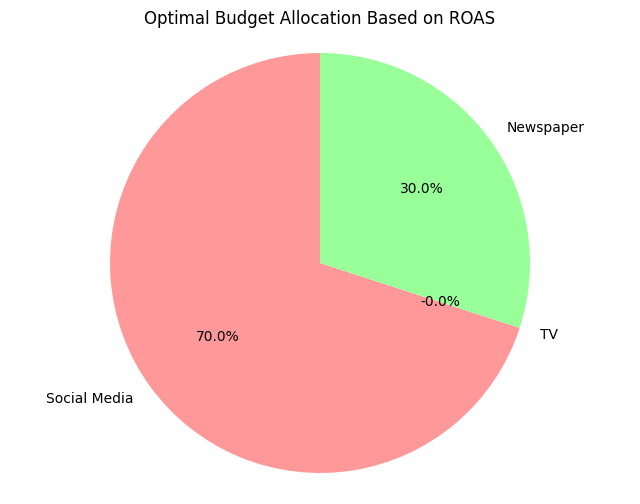

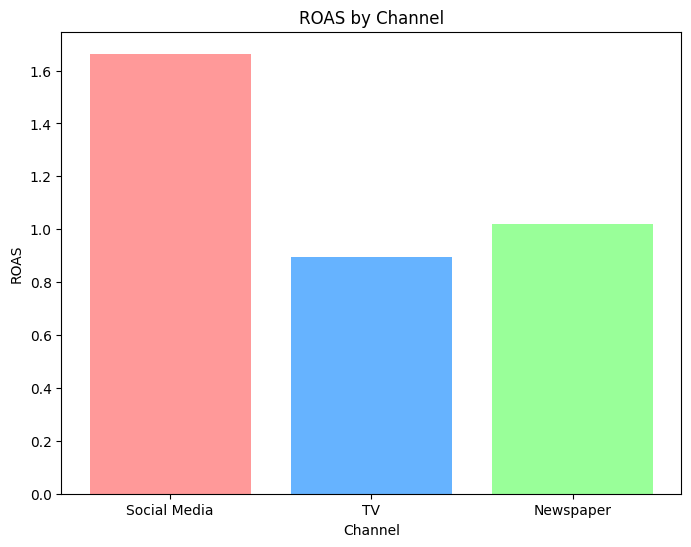

In [142]:
import matplotlib.pyplot as plt

# Channels and their optimal allocations
channels = ['Social Media', 'TV', 'Newspaper']
optimal_allocation = [optimal_allocation[0], optimal_allocation[1], optimal_allocation[2]]
roas = [ROAS_social, ROAS_tv, ROAS_news]

# Pie chart for optimal budget allocation
plt.figure(figsize=(8, 6))
plt.pie(optimal_allocation, labels=channels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title("Optimal Budget Allocation Based on ROAS")
plt.axis('equal')
plt.show()

# Bar chart to compare ROAS for each channel
plt.figure(figsize=(8, 6))
plt.bar(channels, roas, color=['#ff9999','#66b3ff','#99ff99'])
plt.title("ROAS by Channel")
plt.xlabel('Channel')
plt.ylabel('ROAS')
plt.show()


## Budget Allocation Review:

The ROAS for Social Media is the highest, meaning it provides the best return on the advertising spend. Hence, it is logical to allocate a larger portion of the marketing budget to this channel. This means that 70% of the budget was allocated to Social Media in optimization process.


In [118]:
import pymc as pm
import arviz as az

with pm.Model() as mmm_model:
    # Priors with HalfNormal (positive-only)
    intercept = pm.Normal('intercept', mu=2.87, sigma=2)

    beta_social = pm.HalfNormal('beta_social', sigma=1)
    beta_tv = pm.HalfNormal('beta_tv', sigma=1)
    beta_news = pm.HalfNormal('beta_news', sigma=1)

    # Expected value (linear model)
    mu = (intercept 
          + beta_social * X['log_Social_Adstock'] 
          + beta_tv * X['log_TV_Adstock'] 
          + beta_news * X['log_newspaper_Adstock'])

    # Likelihood
    sigma = pm.Exponential('sigma', 1)
    likelihood = pm.Normal('obs', mu=mu, sigma=sigma, observed=y)

    # Inference: Sample from posterior
    trace = pm.sample(2000, tune=1000, target_accept=0.95, return_inferencedata=True)


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, beta_social, beta_tv, beta_news, sigma]


/opt/miniconda3/envs/pandas_env/lib/python3.10/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" 
for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 30 seconds.
There were 18 divergences after tuning. Increase `target_accept` or reparameterize.


In [119]:
az.summary(trace, hdi_prob=0.95)

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
intercept,-3.044,0.916,-4.862,-1.347,0.018,0.012,2474.0,2136.0,1.0
beta_social,0.684,0.105,0.472,0.884,0.002,0.001,3219.0,3244.0,1.0
beta_tv,0.154,0.100,0.000,0.338,0.002,0.002,2481.0,1997.0,1.0
beta_news,0.116,0.083,0.000,0.271,0.001,0.001,2276.0,1622.0,1.0
sigma,0.332,0.018,0.298,0.367,0.000,0.000,4001.0,4142.0,1.0


array([<Axes: title={'center': 'beta_social'}>,
       <Axes: title={'center': 'beta_tv'}>,
       <Axes: title={'center': 'beta_news'}>], dtype=object)

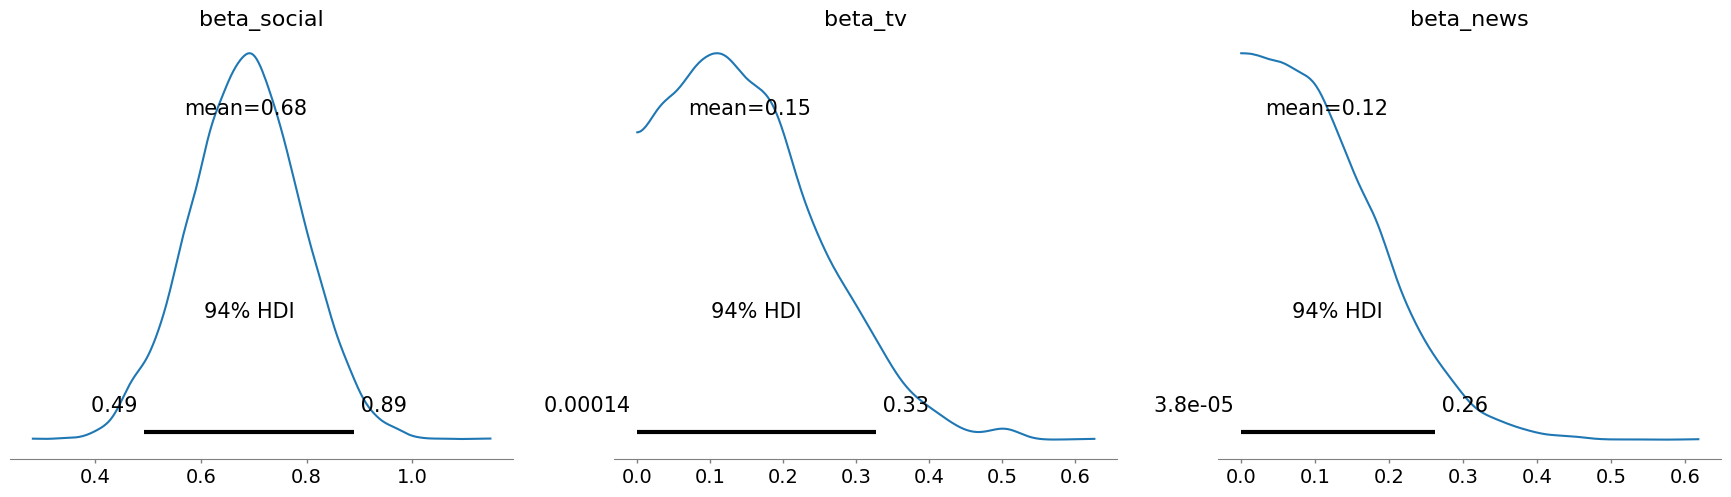

In [120]:
az.plot_posterior(trace, var_names=['beta_social', 'beta_tv', 'beta_news'])

In [121]:
# Exponentiate the coefficients to interpret as percentage change
exp_beta_social = np.exp(trace.posterior['beta_social'].mean(dim='draw').values)
exp_beta_tv = np.exp(trace.posterior['beta_tv'].mean(dim='draw').values)
exp_beta_news = np.exp(trace.posterior['beta_news'].mean(dim='draw').values)

# Print the results
print(f"Exponentiated Beta for Social Media: {exp_beta_social}")
print(f"Exponentiated Beta for TV: {exp_beta_tv}")
print(f"Exponentiated Beta for Newspaper: {exp_beta_news}")

Exponentiated Beta for Social Media: [1.9869048  1.98106117 1.97632067 1.98450308]
Exponentiated Beta for TV: [1.16433583 1.16905547 1.16961935 1.1648071 ]
Exponentiated Beta for Newspaper: [1.12549091 1.11918019 1.12417947 1.12517336]


In [122]:
# Exponentiated betas (ROAS estimates)
ROAS_social = exp_beta_social.mean()  # Mean of the posterior distribution
ROAS_tv = exp_beta_tv.mean()
ROAS_news = exp_beta_news.mean()

print(f"ROAS for Social Media: {ROAS_social}")
print(f"ROAS for TV: {ROAS_tv}")
print(f"ROAS for Newspaper: {ROAS_news}")


ROAS for Social Media: 1.9821974330277157
ROAS for TV: 1.166954434895481
ROAS for Newspaper: 1.1235059819316682


In [123]:
from scipy.optimize import linprog

# Objective function: Maximize ROAS
# We negate the ROAS because linprog minimizes by default
c = [-ROAS_social, -ROAS_tv, -ROAS_news]

# Constraints: Total budget should not exceed the available budget
budget_constraint = [1, 1, 1]  # Sum of allocation for each channel
budget_limit = 100  # Total marketing budget (example)

# Bounds: Each channel gets a non-negative share of the budget
# Let's assume we want to limit Social Media to 70% of the budget, TV to 50%, and Newspaper to 50%
boundsu = [(0, 0.7 * budget_limit), (0, 0.5 * budget_limit), (0, 0.3 * budget_limit)]


# Solve the optimization problem
result = linprog(c, A_eq=[budget_constraint], b_eq=[budget_limit], bounds=boundsu, method='highs')

# Display the optimal allocation of the budget
optimal_allocation = result.x
print(f"Optimal Allocation: Social Media: {optimal_allocation[0]}, TV: {optimal_allocation[1]}, Newspaper: {optimal_allocation[2]}")


Optimal Allocation: Social Media: 70.0, TV: 30.0, Newspaper: 0.0


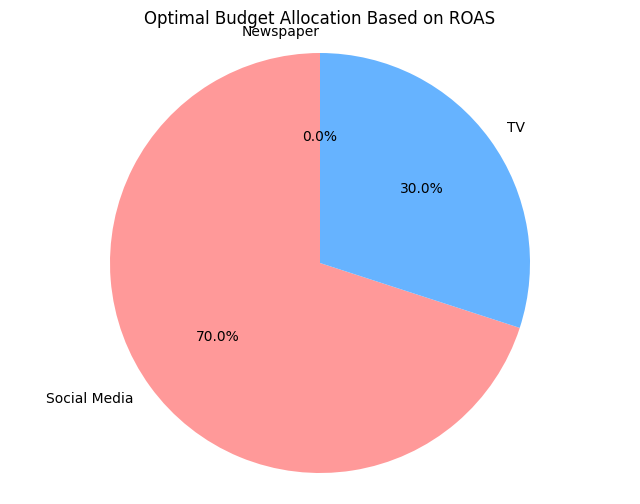

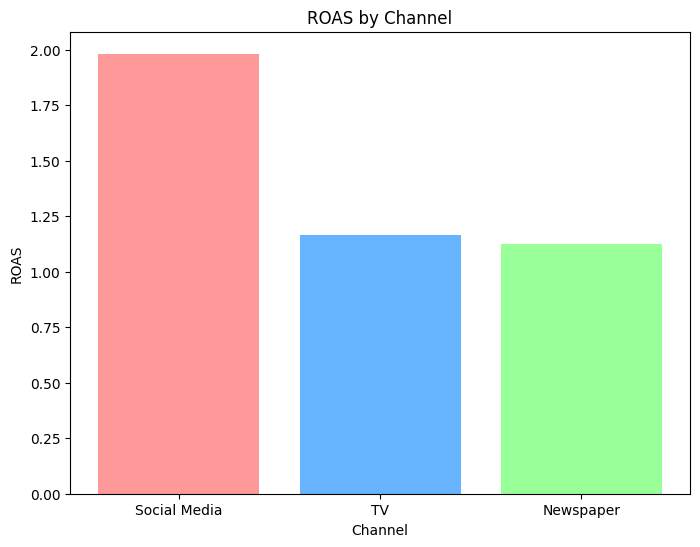

In [124]:
import matplotlib.pyplot as plt

# Channels and their optimal allocations
channels = ['Social Media', 'TV', 'Newspaper']
optimal_allocation = [optimal_allocation[0], optimal_allocation[1], optimal_allocation[2]]
roas = [ROAS_social, ROAS_tv, ROAS_news]

# Pie chart for optimal budget allocation
plt.figure(figsize=(8, 6))
plt.pie(optimal_allocation, labels=channels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title("Optimal Budget Allocation Based on ROAS")
plt.axis('equal')
plt.show()

# Bar chart to compare ROAS for each channel
plt.figure(figsize=(8, 6))
plt.bar(channels, roas, color=['#ff9999','#66b3ff','#99ff99'])
plt.title("ROAS by Channel")
plt.xlabel('Channel')
plt.ylabel('ROAS')
plt.show()


In [102]:
import pymc as pm
import arviz as az

# 1. Centering the predictors
X_centered = X - X.mean()

# 2. Model Definition
with pm.Model() as mmm_model:
    # Define shared data variables
    tv = pm.Data('TV', X_centered['log_TV_Adstock'].values)
    social = pm.Data('Social', X_centered['log_Social_Adstock'].values)
    news = pm.Data('News', X_centered['log_newspaper_Adstock'].values)

    # 3. Priors
    intercept = pm.Normal('intercept', mu=y.mean(), sigma=2)
    beta_tv = pm.Laplace('beta_tv', mu=0, b=0.75)
    beta_social = pm.Laplace('beta_social', mu=0, b=1)
    beta_news = pm.Laplace('beta_news', mu=0, b=1)

    # 4. Interaction term (TV × Social)
    interaction = pm.Deterministic('TV_Social_interaction', tv * social)

    # 5. Linear model
    mu = (
        intercept
        + beta_tv * tv
        + beta_social * social
        + beta_news * news
        + interaction
    )

    # 6. Likelihood
    sigma = pm.HalfCauchy('sigma', beta=1)
    likelihood = pm.Normal('obs', mu=mu, sigma=sigma, observed=y.values)

    # 7. Sampling from posterior
    trace = pm.sample(
        2000,
        tune=1000,
        target_accept=0.95,
        return_inferencedata=True
    )

# Optional: Visualize the model graph
# pm.model_to_graphviz(mmm_model).render(filename='model', format='png')


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, beta_tv, beta_social, beta_news, sigma]


/opt/miniconda3/envs/pandas_env/lib/python3.10/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" 
for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.


In [103]:
az.summary(trace, hdi_prob=0.95)

/opt/miniconda3/envs/pandas_env/lib/python3.10/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/opt/miniconda3/envs/pandas_env/lib/python3.10/site-packages/arviz/stats/diagnostics.py:991: RuntimeWarning: invalid value encountered in scalar divide
  varsd = varvar / evar / 4


,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
intercept,2.664,0.024,2.618,2.711,0.000,0.000,9105.0,5283.0,1.0
beta_tv,0.296,0.146,0.006,0.567,0.001,0.002,9952.0,5951.0,1.0
beta_social,0.826,0.114,0.601,1.045,0.001,0.001,9298.0,5714.0,1.0
beta_news,0.070,0.118,-0.151,0.305,0.001,0.001,10345.0,5731.0,1.0
sigma,0.327,0.017,0.295,0.361,0.000,0.000,10636.0,6327.0,1.0
...,...,...,...,...,...,...,...,...,...
TV_Social_interaction[181],0.031,0.000,0.031,0.031,0.000,0.000,8000.0,8000.0,NaN
TV_Social_interaction[182],0.058,0.000,0.058,0.058,0.000,0.000,8000.0,8000.0,NaN
TV_Social_interaction[183],0.044,0.000,0.044,0.044,0.000,NaN,8000.0,8000.0,NaN
TV_Social_interaction[184],-0.006,0.000,-0.006,-0.006,0.000,NaN,8000.0,8000.0,NaN


array([<Axes: title={'center': 'beta_social'}>,
       <Axes: title={'center': 'beta_tv'}>,
       <Axes: title={'center': 'beta_news'}>], dtype=object)

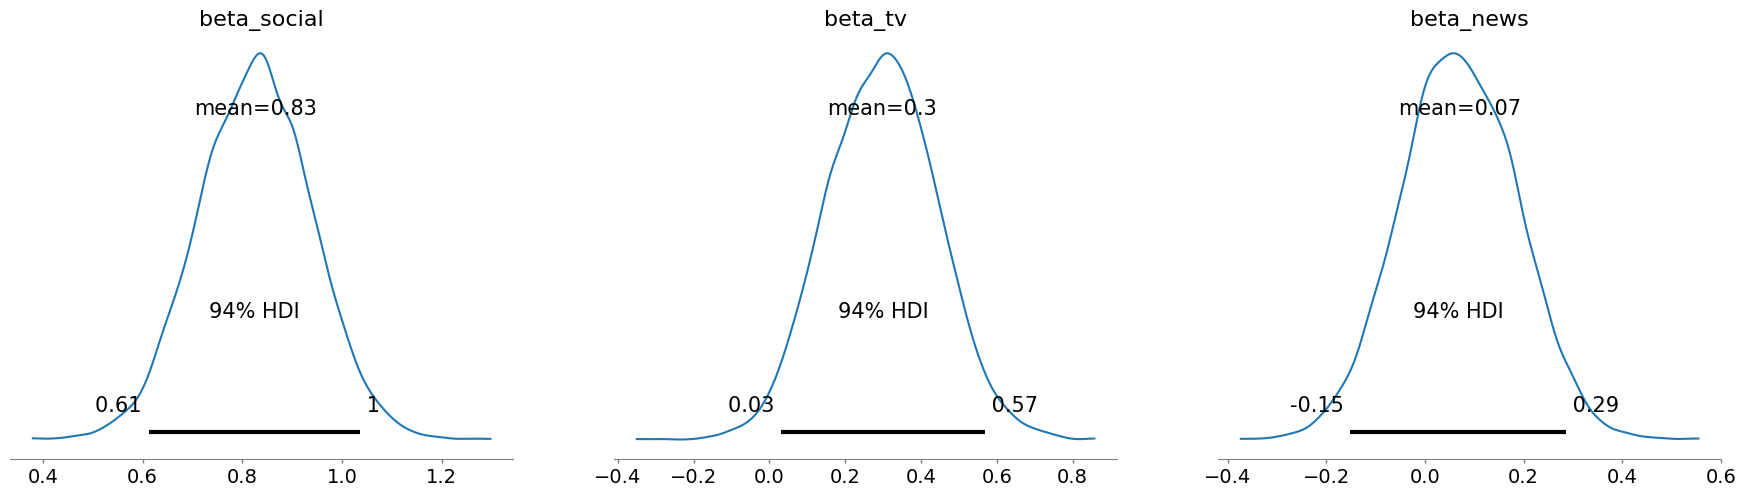

In [104]:
az.plot_posterior(trace, var_names=['beta_social', 'beta_tv', 'beta_news'])

In [105]:
# Exponentiate the coefficients to interpret as percentage change
exp_beta_social = np.exp(trace.posterior['beta_social'].mean(dim='draw').values)
exp_beta_tv = np.exp(trace.posterior['beta_tv'].mean(dim='draw').values)
exp_beta_news = np.exp(trace.posterior['beta_news'].mean(dim='draw').values)

# Print the results
print(f"Exponentiated Beta for Social Media: {exp_beta_social}")
print(f"Exponentiated Beta for TV: {exp_beta_tv}")
print(f"Exponentiated Beta for Newspaper: {exp_beta_news}")

Exponentiated Beta for Social Media: [2.28046013 2.28099962 2.2814421  2.29209287]
Exponentiated Beta for TV: [1.34435044 1.3434145  1.34672394 1.34411852]
Exponentiated Beta for Newspaper: [1.07302602 1.07228119 1.06878722 1.07382691]


In [106]:
# Exponentiated betas (ROAS estimates)
ROAS_social = exp_beta_social.mean()  # Mean of the posterior distribution
ROAS_tv = exp_beta_tv.mean()
ROAS_news = exp_beta_news.mean()

print(f"ROAS for Social Media: {ROAS_social}")
print(f"ROAS for TV: {ROAS_tv}")
print(f"ROAS for Newspaper: {ROAS_news}")


ROAS for Social Media: 2.2837486789162553
ROAS for TV: 1.344651851065585
ROAS for Newspaper: 1.0719803328047335


In [107]:
from scipy.optimize import linprog

# Objective function: Maximize ROAS
# We negate the ROAS because linprog minimizes by default
c = [-ROAS_social, -ROAS_tv, -ROAS_news]

# Constraints: Total budget should not exceed the available budget
budget_constraint = [1, 1, 1]  # Sum of allocation for each channel
budget_limit = 100  # Total marketing budget (example)

# Bounds: Each channel gets a non-negative share of the budget
# Let's assume we want to limit Social Media to 70% of the budget, TV to 50%, and Newspaper to 50%
bounds = [(0, 0.7 * budget_limit), (0, 0.5 * budget_limit), (0, 0.3 * budget_limit)]


# Solve the optimization problem
result = linprog(c, A_eq=[budget_constraint], b_eq=[budget_limit], bounds=bounds, method='highs')

# Display the optimal allocation of the budget
optimal_allocation = result.x
print(f"Optimal Allocation: Social Media: {optimal_allocation[0]}, TV: {optimal_allocation[1]}, Newspaper: {optimal_allocation[2]}")


Optimal Allocation: Social Media: 70.0, TV: 30.0, Newspaper: 0.0
